In [1]:
import pandas as pd
import numpy as np
import numpy
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
import glob

In [2]:
df_train = pd.read_pickle('df_train')
df_test = pd.read_pickle('df_test')
del(df_train['DateTime'])

In [3]:
std = {'W': 1.5e5, 'HiT': 5, 'LoT' : 5}

In [4]:
df_train['W'].mean()

562629.0730947304

In [5]:
df_train['W'] = df_train['W'] / std['W']
for param in ['HiT', 'LoT']:
    df_train[param] = df_train[param] / std[param]
    df_test[param] = df_test[param] / std[param]

In [6]:
df_train

,W,HiT,LoT,isWeekend
0,3.463985,6.0,3.6,0
1,3.322316,6.0,3.6,0
2,3.228695,6.0,3.6,0
3,3.109198,6.0,3.6,0
4,3.237810,6.0,3.6,0
5,3.122625,6.0,3.6,0
6,2.610293,6.0,3.6,0
7,2.879477,6.0,3.6,0
8,3.389768,6.0,3.6,0
9,4.812751,6.0,3.6,0


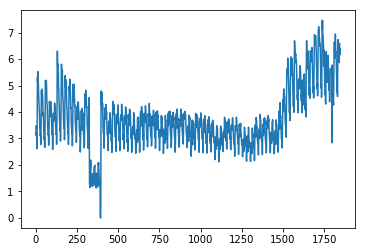

In [7]:
plt.plot(df_train['W'][:])
plt.show()

In [8]:
df_train['W'][326:393].mean()

1.5103111618364438

In [9]:
df_train['W'][326:396] += df_train['W'][0:1500].mean() - df_train['W'][326:393].mean()

/Users/Muks/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


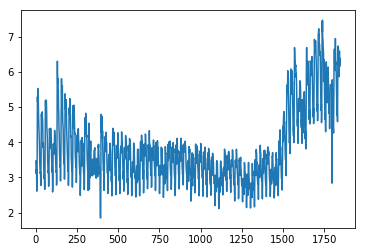

In [10]:
plt.plot(df_train['W'][:])
plt.show()

In [11]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(dataset[i + look_back, :, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [12]:
dataset = df_train.values.reshape((-1, 24, 4))

In [13]:
dataset.shape

(77, 24, 4)

In [14]:
X, y = create_dataset(dataset, look_back=7)
X = X.reshape((X.shape[0], 7, -1))

In [15]:
X.shape, y.shape

((70, 7, 96), (70, 24))

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Input
from keras.callbacks import Callback
from keras.optimizers import adagrad, adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from IPython.display import clear_output

Using TensorFlow backend.


In [17]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(100, input_shape=(7 , 24 * 4)))
model.add(Dense(50, activation='relu'))
model.add(Dense(24))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               78800     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 24)                1224      
Total params: 85,074
Trainable params: 85,074
Non-trainable params: 0
_________________________________________________________________


In [19]:
# model.compile(loss='mean_squared_error', optimizer=adagrad(lr=0.01))
model.compile(loss='mean_squared_error', optimizer='adam')

In [20]:
num_train = 64
X_train = X[ : num_train]
y_train = y[ : num_train]
X_test = X[num_train : ]
y_test = y[num_train : ]

In [21]:
## From https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

class PlotLosses(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

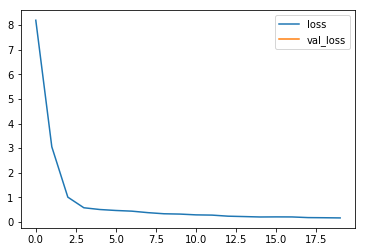

64/64 [==============================] - 0s - loss: 0.1650     


In [27]:
# model.fit(X_train, y_train, epochs=20, callbacks=[plot_losses], batch_size=4)

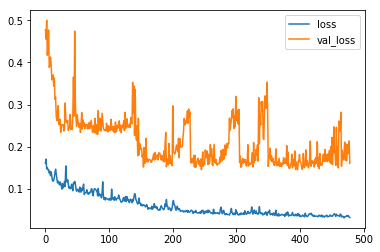

64/64 [==============================] - 0s - loss: 0.0316 - val_loss: 0.1602


In [31]:
# history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), callbacks=[plot_losses], batch_size=4, initial_epoch=21)

In [33]:
history.history['loss']

[0.16041859053075314,
 0.17037396249361336,
 0.14731158223003149,
 0.14975836756639183,
 0.14485323335975409,
 0.14526178175583482,
 0.13738622609525919,
 0.14146931353025138,
 0.13107382762245834,
 0.14005271741189063,
 0.13048708345741034,
 0.1199723007157445,
 0.11768088466487825,
 0.12030540825799108,
 0.12696011853404343,
 0.13855692185461521,
 0.14641667925752699,
 0.13477752287872136,
 0.12412399821914732,
 0.11378922057338059,
 0.11839232966303825,
 0.11354493489488959,
 0.10923413909040391,
 0.1161244404502213,
 0.11406299727968872,
 0.10630741342902184,
 0.098868431290611625,
 0.1118667081464082,
 0.10216403007507324,
 0.10470817540772259,
 0.11720751004759222,
 0.10554664942901582,
 0.15418845042586327,
 0.1222418318502605,
 0.11600259318947792,
 0.12107434496283531,
 0.10957710794173181,
 0.1015868466347456,
 0.1041385754942894,
 0.099820194765925407,
 0.10116108856163919,
 0.11045190063305199,
 0.10532455681823194,
 0.095197621732950211,
 0.11408213363029063,
 0.1120831489

In [24]:
y_pred = model.predict(X)

/Users/Muks/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


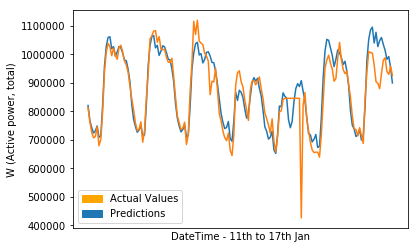

Average rms error =  24036.8776023
Average percentage error =  4.27224236212 %


In [27]:
plt.plot(y_pred[-7:].flatten() * std['W'])
plt.plot(y[-7:].flatten() * std['W'])
plt.axes().get_xaxis().set_ticks([])
orange_patch = mpatches.Patch(color='orange', label='Actual Values')
blue_patch = mpatches.Patch(color='#1f77b4', label='Predictions')
plt.xlabel('DateTime - 11th to 17th Jan')
plt.ylabel('W (Active power, total)')
plt.legend(handles=[orange_patch, blue_patch])
plt.legend()
plt.show()
print("Average rms error = ", 24036.8776023)
print("Average percentage error = ", 0.0427224236212 * 100,  "%")

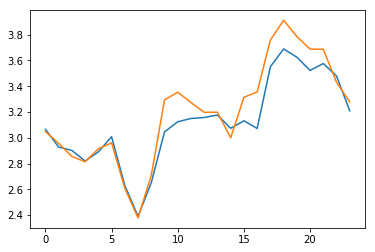

In [38]:
plt.plot(y_pred.flatten()[-21*24:-20*24])
plt.plot(y.flatten()[-21*24:-20*24])
plt.show()

In [39]:
rmse_test = model.evaluate(X_test, y_test)
print(rmse_test * std['W'])
print(rmse_test * std['W']/562629.0730947304)

6/6 [==============================] - 0s
24036.8776023
0.0427224236212


In [40]:
model.compile(loss='mean_squared_error', optimizer=adagrad(lr=0.1))

In [23]:
model.load_weights('model_weights_new_input.h5')

In [60]:
testData = df_test.values

In [61]:
testData.shape

(264, 3)

In [62]:
testData

array([[ 3.4,  1.4,  0. ],
       [ 3.4,  1.4,  0. ],
       [ 3.4,  1.4,  0. ],
       [ 3.4,  1.4,  0. ],
       [ 3.4,  1.4,  0. ],
       [ 3.4,  1.4,  0. ],
       [ 3.4,  1.4,  0. ],
       [ 3.4,  1.4,  0. ],
       [ 3.4,  1.4,  0. ],
       [ 3.4,  1.4,  0. ],
       [ 3.4,  1.4,  0. ],
       [ 3.4,  1.4,  0. ],
       [ 3.4,  1.4,  0. ],
       [ 3.4,  1.4,  0. ],
       [ 3.4,  1.4,  0. ],
       [ 3.4,  1.4,  0. ],
       [ 3.4,  1.4,  0. ],
       [ 3.4,  1.4,  0. ],
       [ 3.4,  1.4,  0. ],
       [ 3.4,  1.4,  0. ],
       [ 3.4,  1.4,  0. ],
       [ 3.4,  1.4,  0. ],
       [ 3.4,  1.4,  0. ],
       [ 3.4,  1.4,  0. ],
       [ 3.8,  1.6,  0. ],
       [ 3.8,  1.6,  0. ],
       [ 3.8,  1.6,  0. ],
       [ 3.8,  1.6,  0. ],
       [ 3.8,  1.6,  0. ],
       [ 3.8,  1.6,  0. ],
       [ 3.8,  1.6,  0. ],
       [ 3.8,  1.6,  0. ],
       [ 3.8,  1.6,  0. ],
       [ 3.8,  1.6,  0. ],
       [ 3.8,  1.6,  0. ],
       [ 3.8,  1.6,  0. ],
       [ 3.8,  1.6,  0. ],
 

In [63]:
X_prev = X[-1:]
y_prev = model.predict(X_prev)

In [64]:
y_prev.shape

(1, 24)

In [65]:
i = 0
# testData[i*24: (i+1)*24].shape
y_prev = model.predict(X_prev)
y_prev.T.shape

(24, 1)

In [66]:
testData[i*24: (i+1)*24].shape

(24, 3)

In [67]:
X_add = np.concatenate((y_prev.T, testData[i*24: (i+1)*24]), axis=1).reshape((1, 1, 24 * 4))

In [68]:
X_add.shape

(1, 1, 96)

In [69]:
X_prev[:, 1:].shape

(1, 6, 96)

In [70]:
np.concatenate((X_prev[:, 1:], X_add), axis=1).shape

(1, 7, 96)

In [74]:
to_predict = 11
X_prev = X[-1:]
preds = []
for i in range(to_predict):
    y_prev = model.predict(X_prev)
    preds.append(y_prev)
    X_add = np.concatenate((y_prev.T, testData[i*24: (i+1)*24]), axis=1).reshape((1, 1, 24 * 4))
    X_prev = np.concatenate((X_prev[:, 1:], X_add), axis=1)

In [75]:
preds = np.asarray(preds).flatten()

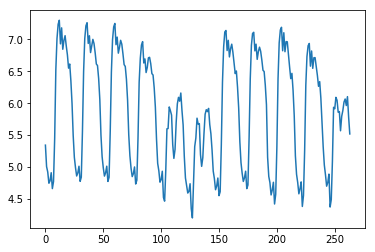

In [76]:
plt.plot(preds)
plt.show()

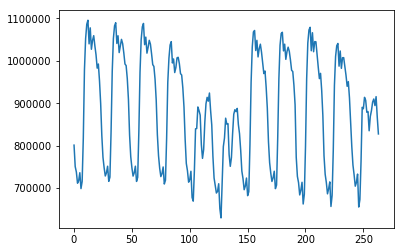

In [79]:
preds = preds * std['W']
plt.plot(preds)
plt.show()

In [80]:
preds

array([  801261.5   ,   750811.875 ,   738063.75  ,   711612.0625,
         717217.125 ,   736334.125 ,   698959.375 ,   715651.6875,
         817172.6875,   978939.    ,  1051984.125 ,  1085860.5   ,
        1095305.    ,  1039715.3125,  1077374.375 ,  1026965.375 ,
        1048005.0625,  1058992.5   ,  1034953.25  ,  1013822.375 ,
         982562.75  ,   992253.125 ,   952754.125 ,   899528.5   ,
         823860.5   ,   772621.625 ,   748121.1875,   728668.5625,
         736041.375 ,   751613.375 ,   716015.    ,   725831.625 ,
         833356.8125,   974729.6875,  1052418.5   ,  1082130.125 ,
        1089456.5   ,  1040697.6875,  1058764.125 ,  1019221.375 ,
        1034492.375 ,  1050279.625 ,  1040226.4375,  1018391.5   ,
         992290.5   ,   988653.4375,   958024.8125,   909124.3125,
         824638.25  ,   774049.3125,   747950.8125,   728412.125 ,
         736085.4375,   751709.875 ,   715829.375 ,   725499.9375,
         833098.125 ,   972539.0625,  1049605.5   ,  1079749.6

In [97]:
s = "Date,Time,\"W (Active power, total)\"\n"
for i in range(17, 27 + 1):
    date = str(i) + "-01-2018"
    for j in range(24):
        time = "%02d:00:00" %(j)
        s += date + "," + time + "," + str("%0.4f") % (preds[(i - 17) * 24 + j]) + "\n"

In [99]:
with open("hourly_predictions.csv", "w") as f:
    f.write(s)

In [100]:
s = "DateTime,\"W (Active power, total)\"\n"
for i in range(17, 27 + 1):
    date = str(i) + "-01-2018"
    for j in range(24):
        time = "%02d:00:00" %(j)
        s += date + " " + time + "," + str("%0.4f") % (preds[(i - 17) * 24 + j]) + "\n"

In [101]:
with open("hourly_predictions_for_plot.csv", "w") as f:
    f.write(s)